In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eig
from numpy.linalg import eig

In [2]:
data=np.array([[3,4],[2,8],[6,9],[10,12]])

In [3]:
data

array([[ 3,  4],
       [ 2,  8],
       [ 6,  9],
       [10, 12]])

In [4]:
data=pd.DataFrame(data,columns=["math","bio"])

In [5]:
data

math  bio
0     3    4
1     2    8
2     6    9
3    10   12

In [6]:
plt.scatter(data["math"],data["bio"])

1. standardization
2. cov mat
3. eig value
4. principal component

1. standardization

In [7]:
data

math  bio
0     3    4
1     2    8
2     6    9
3    10   12

In [8]:
data["math"].mean()

5.25

In [9]:
data["bio"].mean()

8.25

In [10]:
meanbycol=np.mean(data,axis=0)

SND=(X-MEAN/STD_DEV)   #STANDARD NORMALIZATION

In [11]:
data-meanbycol

math   bio
0 -2.25 -4.25
1 -3.25 -0.25
2  0.75  0.75
3  4.75  3.75

In [12]:
deviation = data-meanbycol

In [13]:
stdbycol=np.std(deviation,axis=0)  #standard_deviation

In [14]:
scaled_data=deviation/stdbycol

In [15]:
scaled_data

math       bio
0 -0.722897 -1.485297
1 -1.044185 -0.087370
2  0.240966  0.262111
3  1.526117  1.310556

In [19]:
#doing the same standardization using the sklearn
from sklearn.preprocessing import StandardScaler

In [20]:
scaler=StandardScaler()

In [21]:
scaled_data=scaler.fit_transform(data)

We can see that it is the same datas

In [22]:
scaled_data

array([[-0.7228974 , -1.4852969 ],
       [-1.04418513, -0.08737041],
       [ 0.2409658 ,  0.26211122],
       [ 1.52611672,  1.31055608]])

In [23]:
scaled_data.T #finding the transpose

array([[-0.7228974 , -1.04418513,  0.2409658 ,  1.52611672],
       [-1.4852969 , -0.08737041,  0.26211122,  1.31055608]])

2. finding the covariance matrix

In [24]:
cov_mat=np.cov(scaled_data.T)   #for covariance matrix we have to give the transpose value

In [25]:
cov_mat

array([[1.33333333, 1.07605651],
       [1.07605651, 1.33333333]])

3. find the eigen value and eigen vector

In [26]:
eig_value,eig_vector=eig(cov_mat)

In [27]:
eig_value

array([2.40938985, 0.25727682])

In [28]:
eig_vector

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [29]:
scaled_data

array([[-0.7228974 , -1.4852969 ],
       [-1.04418513, -0.08737041],
       [ 0.2409658 ,  0.26211122],
       [ 1.52611672,  1.31055608]])

4. now we have to principl component(we have to transform the data)

In [30]:
#doing dot product between the eigen vector and the scaled datas
eig_vector.dot(scaled_data)

ValueError: shapes (2,2) and (4,2) not aligned: 2 (dim 1) != 4 (dim 0)

In [31]:
eig_vector.T

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

In [32]:
eig_vector.T.dot(scaled_data.T).T

array([[-1.56142916, -0.53909786],
       [-0.80013059,  0.67657018],
       [ 0.35572917,  0.01495207],
       [ 2.00583058, -0.15242439]])

In [33]:
#using sklearn finding the pca

from sklearn.decomposition import PCA

pca=PCA()

In [34]:
pca.fit_transform(scaled_data)

array([[-1.56142916, -0.53909786],
       [-0.80013059,  0.67657018],
       [ 0.35572917,  0.01495207],
       [ 2.00583058, -0.15242439]])

In [35]:
pd.DataFrame(pca.fit_transform(scaled_data), columns=["pC1","pC2"])   #pc means principal components

pC1       pC2
0 -1.561429 -0.539098
1 -0.800131  0.676570
2  0.355729  0.014952
3  2.005831 -0.152424

In [36]:
pca.explained_variance_ratio_

array([0.90352119, 0.09647881])

In [37]:
0.90352119+0.09647881   #100% data after adding both pc1 and pc2  #select more variance

1.0

# Another Example

In [38]:
data2=pd.read_csv("glass.csv")

In [39]:
data2

RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]

aim is to reduce the number of columns
one way is feature selection
another way is pca ---> dimension reduction feature extraction

In [40]:
data2.shape

(214, 10)

In [41]:
scaler

StandardScaler()

In [42]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [43]:
scaler

StandardScaler()

In [44]:
scaled_data2=scaler.fit_transform(data2)

In [45]:
scaled_data2

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.35287683,
        -0.5864509 , -0.84827468],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.35287683,
        -0.5864509 , -0.84827468],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.35287683,
        -0.5864509 , -0.84827468],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ...,  2.95320036,
        -0.5864509 ,  2.01047778],
       [-0.61239854,  1.19327046, -1.86551055, ...,  2.81208731,
        -0.5864509 ,  2.01047778],
       [-0.41436305,  1.00915211, -1.86551055, ...,  3.01367739,
        -0.5864509 ,  2.01047778]])

In [46]:
pca2=PCA()

In [47]:
principal_component=pca2.fit_transform(scaled_data2)

In [48]:
final_data=pd.DataFrame(principal_component,columns=["pc1","pc2","pc3","pc4","pc5","pc6","pc7","pc8","pc9","pc10"])

In [49]:
final_data

pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0   -1.554070  0.161464 -0.366223  1.704215 -0.258966  0.289044 -0.382241   
1   -0.392602 -1.090235 -0.535557  0.793292 -0.255559 -0.018719 -0.048342   
2   -0.204045 -1.444329 -0.544025  0.247816 -0.232830  0.249137 -0.390096   
3   -0.809947 -0.969748 -0.129626  0.409096 -0.476383  0.320338 -0.056907   
4   -0.701201 -1.185343 -0.505793  0.074198 -0.430227  0.348947  0.151081   
..        ...       ...       ...       ...       ...       ...       ...   
209  4.203422  1.113384  0.273666 -0.181335  0.120205  0.427099 -1.339278   
210  4.248547  1.149681 -0.910675  0.523798  0.641930  0.784685  0.568662   
211  3.824309  1.742068 -0.741664  0.051980  0.470042  1.369301  0.682405   
212  4.079575  0.921166 -1.067061 -0.305282  0.533972  1.145214  0.677896   
213  4.117071  1.179917 -0.706190 -0.186511  0.525393  1.365421  0.464425   

          pc8       pc9      pc10  
0    0.115443 -0.193590  0.016206  
1   -0.477627 -0.346713 -0.012257  
2   -0.505357 -0.162389  0.020218  
3   -0.218879 -0.035670  0.091334  
4   -0.265258 -0.230024  0.001367  
..        ...       ...       ...  
209 -0.235861  0.170591 -0.028800  
210 -0.271577  0.109981 -0.013898  
211  0.077767 -0.882609  0.045912  
212 -0.112146  0.069457 -0.027260  
213 -0.101134  0.057700 -0.019440  

[214 rows x 10 columns]

In [50]:
variance_of_component=pca2.explained_variance_ratio_

In [51]:
max(variance_of_component)

0.3055597415457237

In [52]:
min(variance_of_component)

0.00016077971301620516

of course we would take the maximum variance component

In [53]:
variance_of_component.sort()

In [54]:
variance_of_component

array([1.60779713e-04, 6.20907493e-03, 1.82674245e-02, 3.69434911e-02,
       5.47422471e-02, 9.14084695e-02, 1.16632574e-01, 1.40942403e-01,
       2.29133794e-01, 3.05559742e-01])

In [55]:
sum(variance_of_component)

1.0

so all the components after addition represent the entire data

originally you have 9 columns
suppose manager says choose only the 90% of the data

In [56]:
list(variance_of_component)

[0.00016077971301620516,
 0.006209074930117509,
 0.01826742447816871,
 0.03694349109131824,
 0.054742247066984155,
 0.09140846949352643,
 0.11663257433690827,
 0.14094240339448577,
 0.22913379394975097,
 0.3055597415457237]

In [57]:
sorted(list(variance_of_component),reverse=True)

[0.3055597415457237,
 0.22913379394975097,
 0.14094240339448577,
 0.11663257433690827,
 0.09140846949352643,
 0.054742247066984155,
 0.03694349109131824,
 0.01826742447816871,
 0.006209074930117509,
 0.00016077971301620516]

In [58]:
sorted(list(variance_of_component),reverse=True)[:5]

[0.3055597415457237,
 0.22913379394975097,
 0.14094240339448577,
 0.11663257433690827,
 0.09140846949352643]

In [59]:
sum(sorted(list(variance_of_component),reverse=True)[:5])

0.8836769827203952

In [60]:
sum(sorted(list(variance_of_component),reverse=True)[:7])

0.9753627208786976

In [61]:
sum(sorted(list(variance_of_component),reverse=True)[:6])

0.9384192297873793

so, 6 componens gives you amost 90% of the data hence, we would take 6 componenets instead of the whole data

In [62]:
var=sorted(list(variance_of_component),reverse=True)

In [63]:
np.cumsum(var)

array([0.30555974, 0.53469354, 0.67563594, 0.79226851, 0.88367698,
       0.93841923, 0.97536272, 0.99363015, 0.99983922, 1.        ])

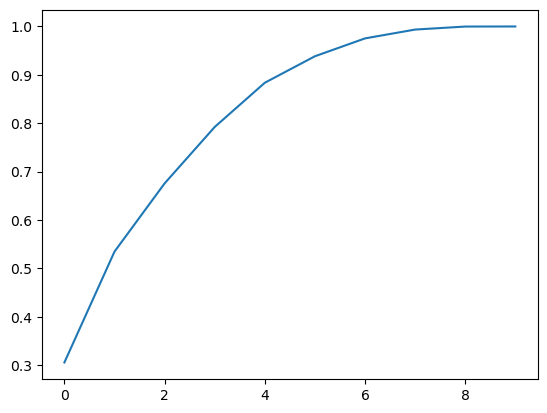

In [64]:
plt.plot(np.cumsum(var))
plt.show()

so, we can after 6 it is constant hence, we would take 6 for 90% of the data and 8 componenets for almost 100% data

In [65]:
final_to_final_data=final_data.iloc[:,4:9]

In [66]:
final_to_final_data

pc5       pc6       pc7       pc8       pc9
0   -0.258966  0.289044 -0.382241  0.115443 -0.193590
1   -0.255559 -0.018719 -0.048342 -0.477627 -0.346713
2   -0.232830  0.249137 -0.390096 -0.505357 -0.162389
3   -0.476383  0.320338 -0.056907 -0.218879 -0.035670
4   -0.430227  0.348947  0.151081 -0.265258 -0.230024
..        ...       ...       ...       ...       ...
209  0.120205  0.427099 -1.339278 -0.235861  0.170591
210  0.641930  0.784685  0.568662 -0.271577  0.109981
211  0.470042  1.369301  0.682405  0.077767 -0.882609
212  0.533972  1.145214  0.677896 -0.112146  0.069457
213  0.525393  1.365421  0.464425 -0.101134  0.057700

[214 rows x 5 columns]